In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:

def show_image(img, title='Image', cmap='gray'):
    plt.imshow(img, cmap=cmap)
    plt.title(title)
    plt.axis('off')

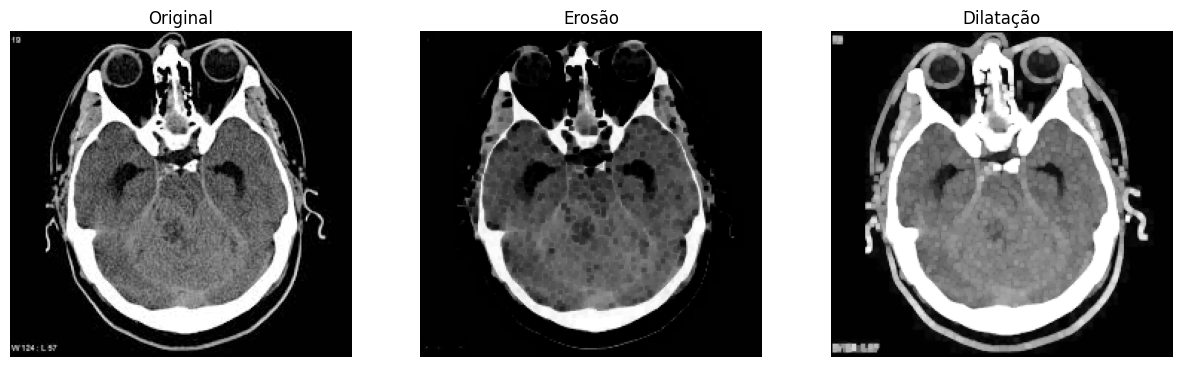

In [15]:

def dilatacao(imagem, kernel):
    altura, largura = imagem.shape
    k_altura, k_largura = kernel.shape
    margem_h = k_altura // 2
    margem_w = k_largura // 2
    
    dilated = np.zeros_like(imagem)
    
    for i in range(margem_h, altura - margem_h):
        for j in range(margem_w, largura - margem_w):
            roi = imagem[i - margem_h:i + margem_h + 1, j - margem_w:j + margem_w + 1]
            dilated[i, j] = np.max(roi[kernel == 1])
    
    return dilated

def erosao(imagem, kernel):
    altura, largura = imagem.shape
    k_altura, k_largura = kernel.shape
    margem_h = k_altura // 2
    margem_w = k_largura // 2
    
    eroded = np.zeros_like(imagem)
    
    for i in range(margem_h, altura - margem_h):
        for j in range(margem_w, largura - margem_w):
            roi = imagem[i - margem_h:i + margem_h + 1, j - margem_w:j + margem_w + 1]
            eroded[i, j] = np.min(roi[kernel == 1])
    
    return eroded


img = cv2.imread('cabeca.jpg', cv2.IMREAD_GRAYSCALE)
kernel_5x5 = np.ones((3, 3), dtype=np.uint8)



img_erodida = erosao(img, kernel_5x5)
img_dilatada = dilatacao(img, kernel_5x5)

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1), show_image(img, title = 'Original')
plt.subplot(1, 3, 2), show_image(img_erodida, title ='Erosão')
plt.subplot(1, 3, 3), show_image(img_dilatada, title ='Dilatação')
plt.show()

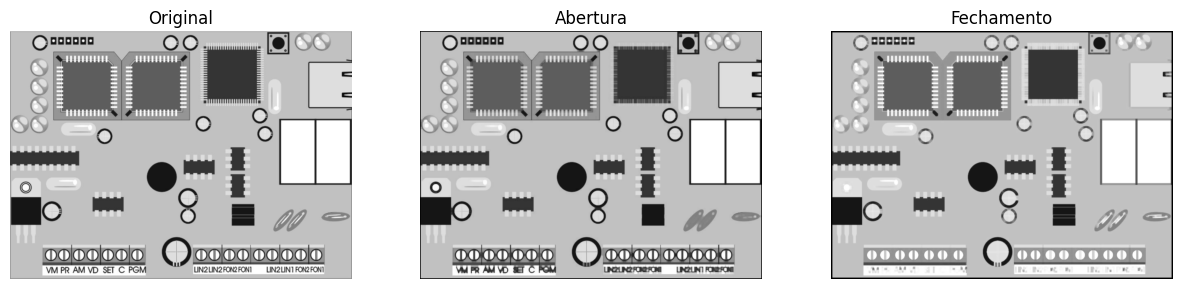

In [4]:


def abertura(imagem, kernel):
    # Abertura = Erosão -> Dilatação
    etapa1 = erosao(imagem, kernel)
    etapa2 = dilatacao(etapa1, kernel)
    return etapa2

def fechamento(imagem, kernel):
    # Fechamento = Dilatação -> Erosão
    etapa1 = dilatacao(imagem, kernel)
    etapa2 = erosao(etapa1, kernel)
    return etapa2


img = cv2.imread('componente.png', cv2.IMREAD_GRAYSCALE)
kernel = np.ones((5, 5), dtype=np.uint8)

abertura_resultado = abertura(img, kernel)
fechamento_resultado = fechamento(img, kernel)

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1), show_image(img, title ='Original')
plt.subplot(1, 3, 2), show_image(abertura_resultado, title='Abertura')
plt.subplot(1, 3, 3), show_image(fechamento_resultado, title ='Fechamento')
plt.show()

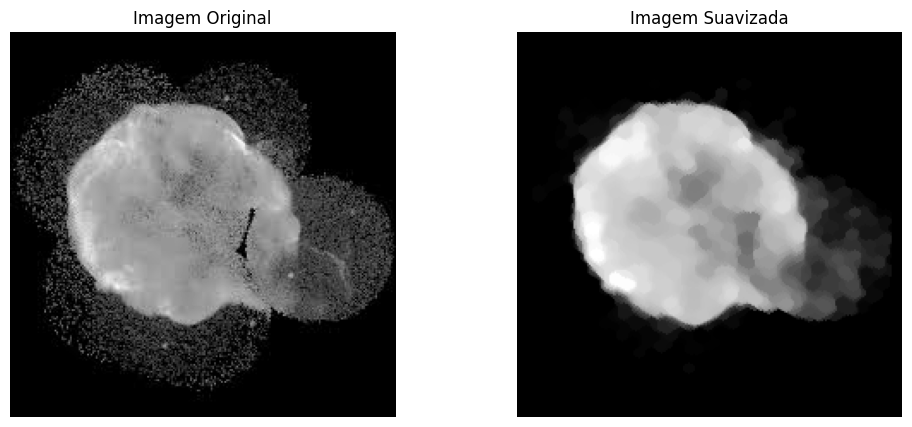

In [5]:
# --- Suavização ---

img = cv2.imread('suavizar.jpg', cv2.IMREAD_GRAYSCALE)

# Define o raio do disco (1, 3, 5)
radius = 3  
kernel_size = 2*radius + 1
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (kernel_size, kernel_size))

# Aplica abertura + fechamento
resultado = abertura(img,kernel)
resultado = fechamento(resultado,kernel)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
show_image(img, title='Imagem Original')
plt.subplot(1, 2, 2)  
show_image(resultado, title='Imagem Suavizada')

plt.show()


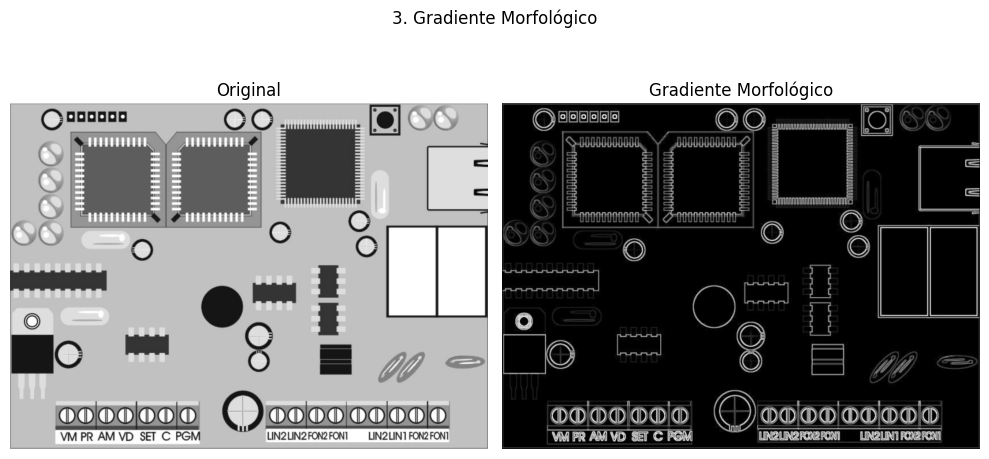

In [6]:
# --- Gradiente Morfológico ---

def gradiente_morfologico(imagem, kernel):

    # Aplica dilatação e erosão
    img_dilatada = dilatacao(imagem, kernel)
    img_erodida = erosao(imagem, kernel)
    
    # Gradiente morfológico é a diferença entre dilatação e erosão
    gradiente = img_dilatada - img_erodida
    
    return gradiente

img_grad_test = cv2.imread('componente.png', cv2.IMREAD_GRAYSCALE)
kernel_size = (3, 3)  
kernel_5x5 = np.ones(kernel_size, dtype=np.uint8)
gradient_img = gradiente_morfologico(img_grad_test, kernel_5x5)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
show_image(img_grad_test, title='Original')
plt.subplot(1, 2, 2)
show_image(gradient_img, title='Gradiente Morfológico')
plt.suptitle("3. Gradiente Morfológico")
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


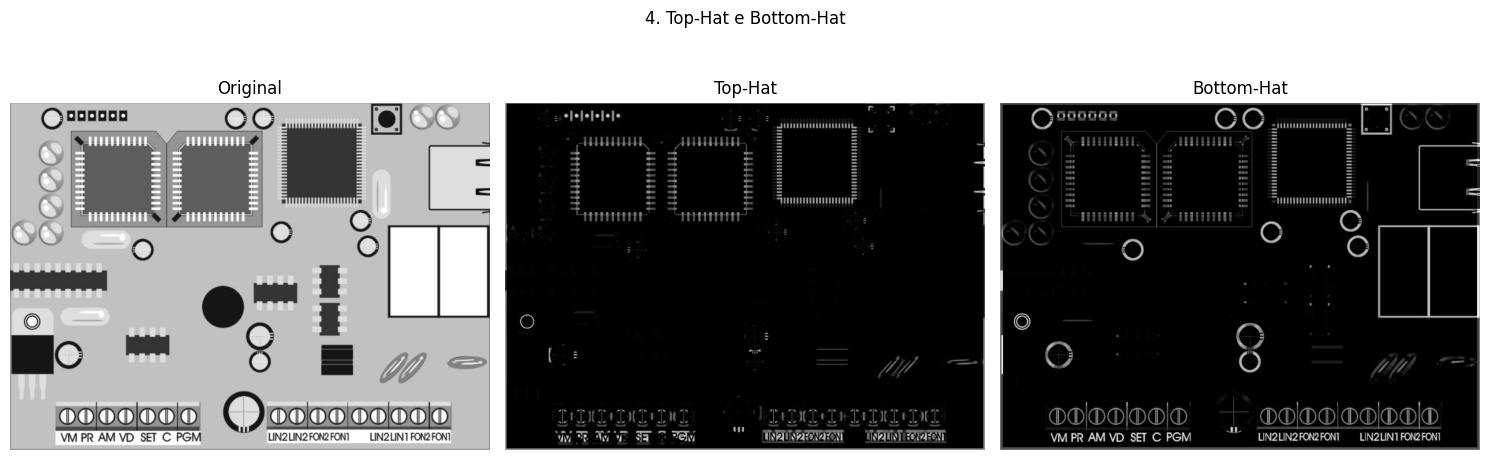

In [ ]:

# ---Top-hat e Bottom-hat ---

def top_hat(imagem, kernel):
    # Top-Hat = imagem original - abertura da imagem
    img_abertura = abertura(imagem, kernel)
    top_hat = imagem - img_abertura
    return top_hat

def bottom_hat(imagem, kernel):
    # Bottom-Hat = fechamento da imagem - imagem original
    img_fechamento = fechamento(imagem, kernel)
    bottom_hat = img_fechamento - imagem
    return bottom_hat

img_hat_test = cv2.imread('componente.png', cv2.IMREAD_GRAYSCALE)

kernel_size = (7, 7)  
kernel_5x5 = np.ones(kernel_size, dtype=np.uint8)
top_hat_img = top_hat(img_hat_test, kernel_5x5)
bottom_hat_img = bottom_hat(img_hat_test, kernel_5x5)

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
show_image(img_hat_test, title='Original')
plt.subplot(1, 3, 2)
show_image(top_hat_img, title='Top-Hat')
plt.subplot(1, 3, 3)
show_image(bottom_hat_img, title='Bottom-Hat')
plt.suptitle("4. Top-Hat e Bottom-Hat")
plt.show()



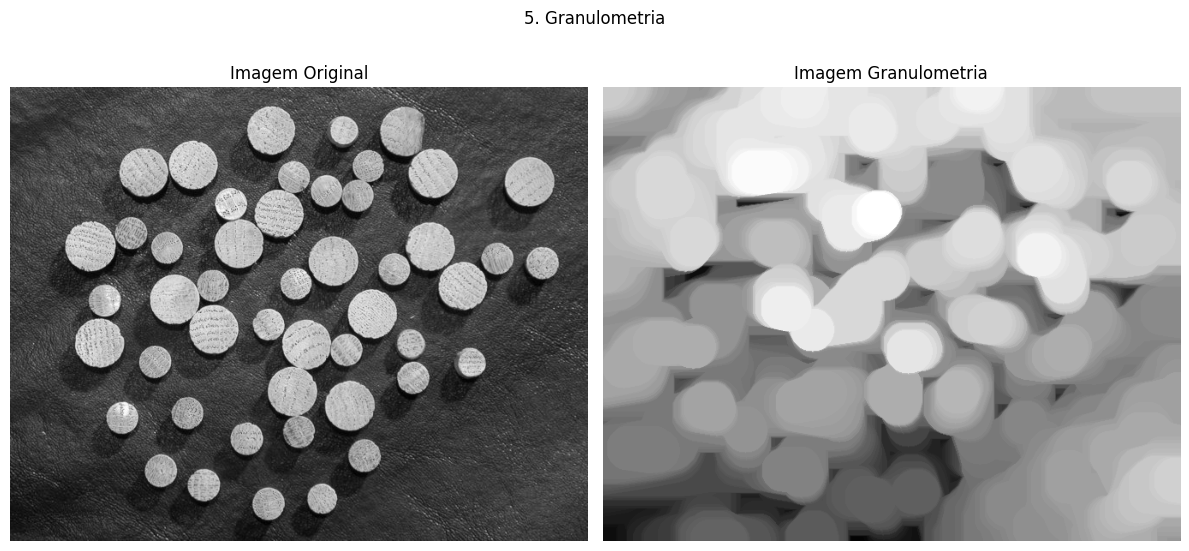

In [13]:
# ---  Granulometria ---

img_original = cv2.imread('dowels.tif', cv2.IMREAD_GRAYSCALE)
img_suavizada = cv2.GaussianBlur(img_original, (5, 5), 0)

def granulometry(image, max_se_size, step):

    granulometry_data = []
    current_image = image.copy()
    original_sum = np.sum(image / 255.0)
    granulometry_data.append((0, original_sum))
    
    for r_se in range(step, max_se_size + 1, step):
        kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (r_se, r_se))
        if kernel.size == 0:
            continue
        
        current_image = cv2.morphologyEx(current_image, cv2.MORPH_OPEN, kernel)
        current_sum = np.sum(current_image / 255.0)
        granulometry_data.append((r_se, current_sum))
    
    return current_image, granulometry_data


img_final, granulometry_curve = granulometry(img_suavizada, max_se_size=50, step=2)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
show_image(img_original, title='Imagem Original')
plt.subplot(1, 2, 2)
show_image(img_final, title='Imagem Granulometria')
plt.suptitle("5. Granulometria")
plt.tight_layout()
plt.show()


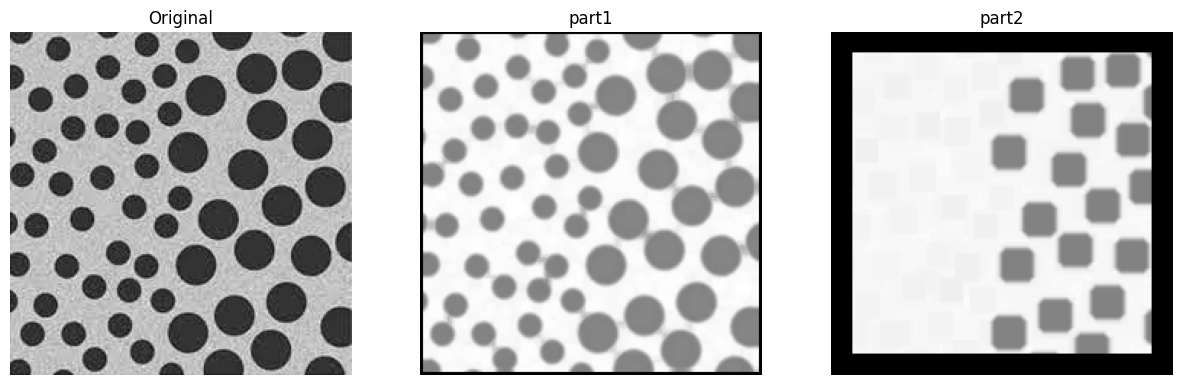

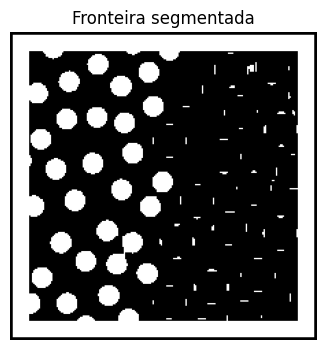

In [14]:
# --- Segmentação de Texturas  ---


img_textura = cv2.imread('textura.jpg', cv2.IMREAD_GRAYSCALE)


img_suavizada = cv2.GaussianBlur(img_textura, (5, 5), 0)

kernel_size = (5, 5)  
kernel1 = np.ones(kernel_size, dtype=np.uint8)
kernel_size = (15, 15)  
kernel2 = np.ones(kernel_size, dtype=np.uint8)

part1 = abertura(img_suavizada, kernel1)
part2 = fechamento(img_suavizada, kernel2)

diferenca = cv2.absdiff(part2, part1)

limiar = np.mean(diferenca) * 1.2
_, mascara_fronteira = cv2.threshold(diferenca, limiar, 255, cv2.THRESH_BINARY)


plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
show_image(img_textura, title='Original')
plt.subplot(1, 3, 2)
show_image(part1, title='part1')
plt.subplot(1, 3, 3)
show_image(part2, title='part2')

plt.figure(figsize=(8, 4))
plt.imshow(mascara_fronteira, cmap='gray')
plt.title('Fronteira segmentada')
plt.axis('off')
plt.show()
